In [1]:
%cd "d:\Project\urbanlytic 2019"

d:\Project\urbanlytic 2019


In [2]:
import pandas as pd

air = pd.read_json("./dataset/air_sensor.json")

In [3]:
air.head()

,CreatedDateTime,DeviceDataTypeId,DeviceId,DisplayName,FabrickName,Name,Status,Unit,Value,_id
0,1558483274,3,96,deviceType,deviceType,deviceType,None,None,3.00,{'$oid': '5ce4917e31b72844b7141430'}
1,1558483274,6,96,temperature,temperature,temperature,Warning,Â°C,29.14,{'$oid': '5ce4917e31b72844b7141433'}
2,1558483742,5,96,pm25,pm25,pm25,Normal,ug/m3,35.00,{'$oid': '5ce4935d31b728505c55b058'}
3,1558486083,5,96,pm25,pm25,pm25,Normal,ug/m3,29.00,{'$oid': '5ce49c8131b7280a6c4cf591'}
4,1558532656,5,96,pm25,pm25,pm25,Normal,ug/m3,24.00,{'$oid': '5ce5526331b728770169696a'}


In [4]:
air.shape

(82069, 10)

In [6]:
# convert createdDatetime into datetime format

from datetime import datetime

air["date_time"] = pd.to_datetime(air["CreatedDateTime"], unit = "s")
air = air.set_index("date_time")
air.head()

,CreatedDateTime,DeviceDataTypeId,DeviceId,DisplayName,FabrickName,Name,Status,Unit,Value,_id
date_time,,,,,,,,,,
2019-05-22 00:01:14,1558483274,3,96,deviceType,deviceType,deviceType,None,None,3.00,{'$oid': '5ce4917e31b72844b7141430'}
2019-05-22 00:01:14,1558483274,6,96,temperature,temperature,temperature,Warning,Â°C,29.14,{'$oid': '5ce4917e31b72844b7141433'}
2019-05-22 00:09:02,1558483742,5,96,pm25,pm25,pm25,Normal,ug/m3,35.00,{'$oid': '5ce4935d31b728505c55b058'}
2019-05-22 00:48:03,1558486083,5,96,pm25,pm25,pm25,Normal,ug/m3,29.00,{'$oid': '5ce49c8131b7280a6c4cf591'}
2019-05-22 13:44:16,1558532656,5,96,pm25,pm25,pm25,Normal,ug/m3,24.00,{'$oid': '5ce5526331b728770169696a'}


In [10]:
air["hour"] = air.index.hour
air["weekday name"] = air.index.weekday_name
air.head()

,CreatedDateTime,DeviceDataTypeId,DeviceId,DisplayName,FabrickName,Name,Status,Unit,Value,_id,hour,weekday name
date_time,,,,,,,,,,,,
2019-05-22 00:01:14,1558483274,3,96,deviceType,deviceType,deviceType,None,None,3.00,{'$oid': '5ce4917e31b72844b7141430'},0,Wednesday
2019-05-22 00:01:14,1558483274,6,96,temperature,temperature,temperature,Warning,Â°C,29.14,{'$oid': '5ce4917e31b72844b7141433'},0,Wednesday
2019-05-22 00:09:02,1558483742,5,96,pm25,pm25,pm25,Normal,ug/m3,35.00,{'$oid': '5ce4935d31b728505c55b058'},0,Wednesday
2019-05-22 00:48:03,1558486083,5,96,pm25,pm25,pm25,Normal,ug/m3,29.00,{'$oid': '5ce49c8131b7280a6c4cf591'},0,Wednesday
2019-05-22 13:44:16,1558532656,5,96,pm25,pm25,pm25,Normal,ug/m3,24.00,{'$oid': '5ce5526331b728770169696a'},13,Wednesday


In [11]:
air["DisplayName"].value_counts()

humidity       13683
temperature    13680
heatIndex      13678
deviceType     13676
pm25           13676
RSSI           13676
Name: DisplayName, dtype: int64

In [98]:
air_pm25 = air[air["DisplayName"] == "pm25"]

In [17]:
d0522 = air_pm25.loc["2019-05-22"].shape
d0523 = air_pm25.loc["2019-05-23"].shape
d0524 = air_pm25.loc["2019-05-24"].shape

print(d0522, d0523, d0524)

(207, 12) (407, 12) (346, 12)


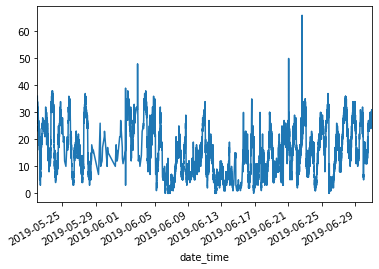

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

air_pm25["Value"].plot() 

In [41]:
from statsmodels.tsa.stattools import adfuller

#Dickey-Fuller test

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = timeseries.plot(color='blue',label='Original')
    mean = rolmean.plot(color='red', label='Rolling Mean')
    std = rolstd.plot(color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [99]:
air_pm25 = air_pm25["Value"].sort_index()

In [107]:
air_pm25_r = air_pm25.resample("1H").mean()

In [122]:
air_pm25_r.dropna(inplace = True)

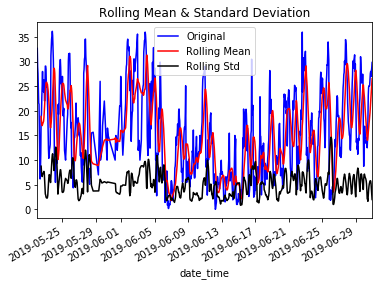

Results of Dickey-Fuller Test:
Test Statistic                  -3.359571
p-value                          0.012417
#Lags Used                      18.000000
Number of Observations Used    841.000000
Critical Value (1%)             -3.438149
Critical Value (5%)             -2.864983
Critical Value (10%)            -2.568603
dtype: float64


In [123]:
test_stationarity(air_pm25_r)
#apparently the test statistic is less than critical value

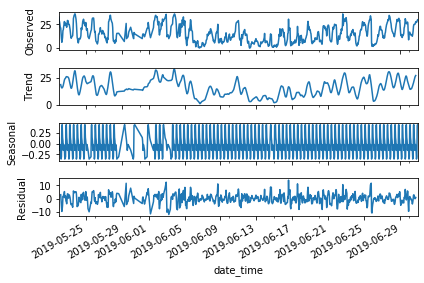

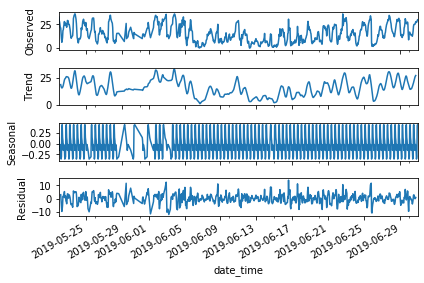

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(air_pm25_r, freq = 10)
result.plot()

In [126]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(air_pm25_r, nlags=20)
lag_pacf = pacf(air_pm25_r, nlags=20, method='ols')

C:\Users\Kdwing\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


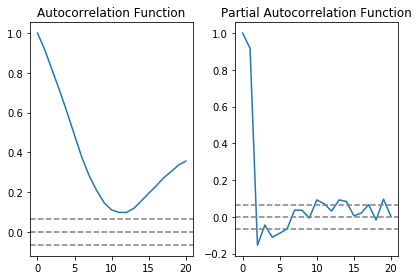

In [128]:
import numpy as np

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(air_pm25_r)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(air_pm25_r)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(air_pm25_r)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(air_pm25_r)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# p = 12, q = 0

In [146]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(air_pm25_r, order=(3, 0, 0))
result = model.fit(disp=0)

C:\Users\Kdwing\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Kdwing\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


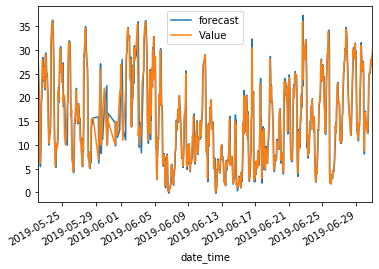

In [148]:
output = result.forecast()
result.plot_predict()
plt.show()

In [152]:
output = result.forecast(168)
output[1]

array([ 3.62335688,  5.40963249,  6.72816505,  7.91824983,  8.96977169,
        9.91058657, 10.77274381, 11.57187937, 12.3193548 , 13.02412801,
       13.69273032, 14.33017858, 14.94045967, 15.5267751 , 16.09174235,
       16.63753611, 17.16598522, 17.67864506, 18.17685159, 18.66176243,
       19.13438842, 19.59561848, 20.04623922, 20.48695073, 20.91837932,
       21.34108799, 21.75558503, 22.16233118, 22.56174564, 22.95421115,
       23.34007826, 23.71966897, 24.09327997, 24.46118523, 24.82363845,
       25.18087507, 25.53311404, 25.88055942, 26.22340175, 26.56181926,
       26.89597899, 27.2260377 , 27.55214279, 27.87443301, 28.19303919,
       28.50808486, 28.81968677, 29.12795545, 29.43299563, 29.73490668,
       30.03378295, 30.32971417, 30.62278572, 30.91307892, 31.20067133,
       31.48563696, 31.7680465 , 32.04796751, 32.32546465, 32.60059981,
       32.8734323 , 33.14401899, 33.41241443, 33.67867101, 33.94283907,
       34.204967  , 34.46510135, 34.72328692, 34.97956686, 35.23

In [154]:
df = pd.DataFrame({"value": output[1]})
df.to_csv("value.csv")

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

air_pm25 = air[air["DeviceDataTypeId"] == 5]
air_humidity = air[air["DisplayName"] == "humidity"]
air_temperature = air[air["DisplayName"] == "temperature"]
air_heatindex = air[air["DisplayName"] == "heatIndex"]
air_rssi = air[air["DisplayName"] == "RSSI"]

air_pm25["Value"].plot(label = "pm25")
air_humidity["Value"].plot(label = "humidity")
air_temperature["Value"].plot(label = "temp")
air_heatindex["Value"].plot(label = "heatindex")
air_rssi["Value"].plot(label = "rssi")
plt.legend()

In [58]:
cols = ["Value", "hour", "weekday name"]
air_pm25_new = air_pm25[cols].copy()

In [61]:
air_pm25_new.isna().sum()

# no NA

Value           0
hour            0
weekday name    0
dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(air_pm25_new, test_size=0.2, random_state=42)

In [63]:
train_set.shape

(10940, 3)

In [65]:
air_train = train_set.drop("Value", axis = 1)
air_label = train_set["Value"].copy()

In [67]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
air_train_cat = air_train[["weekday name"]]
air_cat_1hot = cat_encoder.fit_transform(air_train_cat)
air_cat_1hot

<10940x7 sparse matrix of type '<class 'numpy.float64'>'
	with 10940 stored elements in Compressed Sparse Row format>

In [69]:
cat_encoder.categories_

[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object)]

In [ ]:
air_num